In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')
import os
import glob as gb
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras

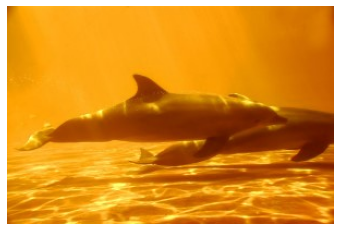

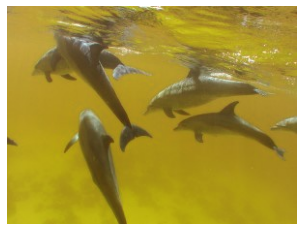

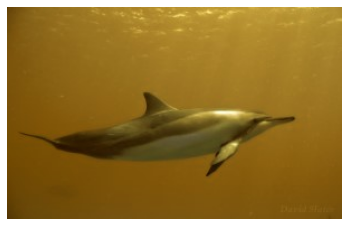

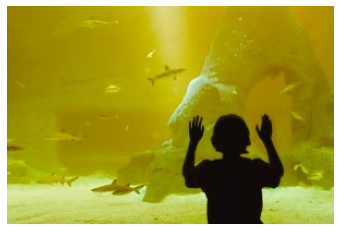

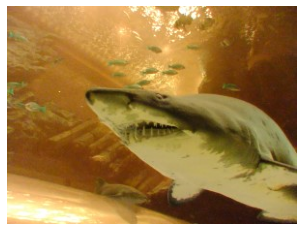

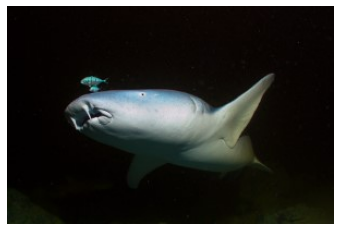

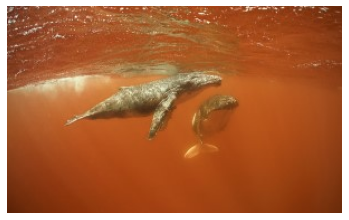

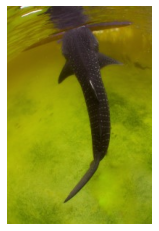

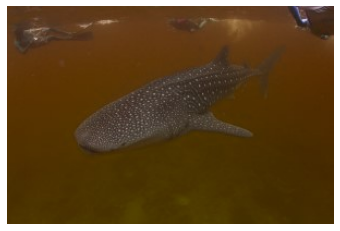

In [5]:
DATADIR = "C:\\Users\\20109\\Downloads\\SeaAnimals"
CATEGORIES = ['Dolphin','Sharks','Whale']

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    x = 0
    for img in os.listdir(path):
        x+=1
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array, cmap='gray')  
        plt.axis('off')
        plt.show()
        if x==3:
            break  


In [6]:
print(img_array)
print(img_array.shape)

[[[95 54 21]
  [96 55 22]
  [95 56 24]
  ...
  [73 48 44]
  [73 47 41]
  [72 46 40]]

 [[92 53 21]
  [92 53 21]
  [93 54 22]
  ...
  [76 52 46]
  [74 48 42]
  [71 45 38]]

 [[91 53 23]
  [89 53 23]
  [90 54 24]
  ...
  [74 51 43]
  [74 48 41]
  [73 48 38]]

 ...

 [[74 49  0]
  [74 49  0]
  [75 50  0]
  ...
  [69 46  0]
  [70 47  1]
  [70 47  1]]

 [[75 50  0]
  [75 50  0]
  [76 51  1]
  ...
  [70 47  1]
  [70 47  1]
  [70 47  1]]

 [[76 51  1]
  [76 51  1]
  [76 51  1]
  ...
  [70 47  1]
  [70 47  1]
  [70 47  1]]]
(200, 300, 3)


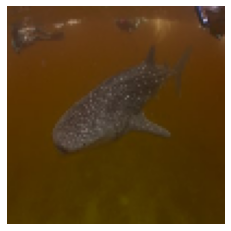

In [7]:
img_size=100
new_array=cv2.resize(img_array,(img_size,img_size))

plt.imshow(new_array,cmap='gray')
plt.axis('off')
plt.show()

In [8]:
Traning_data=[]
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))
                Traning_data.append([new_array, class_num])
            except Exception as e:
                print(f"Error reading image: {e}")

create_training_data()

100%|██████████| 572/572 [00:03<00:00, 143.18it/s]


In [9]:
x=[]
y=[]

for feature,label in Traning_data:
    x.append(feature)
    y.append(label)

In [10]:
x = np.array(x)
y = np.array(y)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=44)

In [28]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1302, 100, 100)
(1302,)
(642, 100, 100)
(642,)


In [29]:
# Normalize input data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [30]:
y_train[:5]

array([0, 2, 1, 0, 2])

In [31]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([0, 2, 1, 0, 2])

In [62]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([0, 0, 2, 0, 1])

In [78]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(img_size,img_size)),
        tf.keras.layers.Dense(800, activation='relu'),
        tf.keras.layers.Dense(600, activation='relu'),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')    
    ])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train, y_train, epochs=51)

Epoch 1/51
1302/1302 [==============================]1302/1302 [==============================] - 7s 6ms/step - loss: 2.4249 - acc: 0.3810

Epoch 2/51
1302/1302 [==============================]1302/1302 [==============================] - 6s 5ms/step - loss: 1.1043 - acc: 0.4240

Epoch 3/51
1302/1302 [==============================]1302/1302 [==============================] - 7s 5ms/step - loss: 1.0460 - acc: 0.4647

Epoch 4/51
1302/1302 [==============================]1302/1302 [==============================] - 7s 5ms/step - loss: 1.0679 - acc: 0.4493

Epoch 5/51
1302/1302 [==============================]1302/1302 [==============================] - 7s 5ms/step - loss: 1.0195 - acc: 0.4839A: 1s - loss: 1.0112 - acc

Epoch 6/51
1302/1302 [==============================]1302/1302 [==============================] - 7s 5ms/step - loss: 0.9990 - acc: 0.4916A: 1s - loss: 1.0005 - acc

Epoch 7/51
1302/1302 [==============================]1302/1302 [==============================] - 7s 6ms/ste

In [79]:
test_loss,test_acc=model.evaluate(x_test,y_test) #predict
print(test_loss)
print(test_acc)

642/642 [==============================]642/642 [==============================] - 1s 824us/step

1.4203659195766272
0.45794392523364486


In [80]:
output=model.predict(x_test)
y_pred=np.argmax(output,axis=1)

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.46      0.50      0.48       238
           1       0.36      0.61      0.45       122
           2       0.57      0.35      0.44       282

    accuracy                           0.46       642
   macro avg       0.46      0.49      0.46       642
weighted avg       0.49      0.46      0.46       642



In [82]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[120  24 117]
 [ 66  74  65]
 [ 52  24 100]]


In [39]:
x_train2 = x_train.reshape(-1, img_size, img_size, 1)
x_test2 = x_test.reshape(-1, img_size, img_size, 1)

In [40]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(img_size,img_size,1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [41]:
cnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [43]:
cnn_model.fit(x_train2, y_train, epochs=10)

Epoch 1/10
1302/1302 [==============================]1302/1302 [==============================] - 13s 10ms/step - loss: 0.6960 - acc: 0.6989

Epoch 2/10
1302/1302 [==============================]1302/1302 [==============================] - 11s 8ms/step - loss: 0.5866 - acc: 0.7504

Epoch 3/10
1302/1302 [==============================]1302/1302 [==============================] - 11s 8ms/step - loss: 0.4681 - acc: 0.8003

Epoch 4/10
1302/1302 [==============================]1302/1302 [==============================] - 11s 8ms/step - loss: 0.3710 - acc: 0.8717

Epoch 5/10
1302/1302 [==============================]1302/1302 [==============================] - 11s 8ms/step - loss: 0.2934 - acc: 0.8986

Epoch 6/10
1302/1302 [==============================]1302/1302 [==============================] - 11s 8ms/step - loss: 0.2298 - acc: 0.9217

Epoch 7/10
1302/1302 [==============================]1302/1302 [==============================] - 11s 8ms/step - loss: 0.1917 - acc: 0.9393

Epoch 8/10
1

In [83]:
test_loss,test_acc=cnn_model.evaluate(x_test2,y_test) #predict
print(test_loss)
print(test_acc)

642/642 [==============================]642/642 [==============================] - 2s 3ms/step

1.8946591038198857
0.5685358255451713


In [84]:
output=cnn_model.predict(x_test2)
y_pred=np.argmax(output,axis=1)

In [85]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.62      0.59      0.60       278
           1       0.58      0.61      0.59       192
           2       0.48      0.49      0.48       172

    accuracy                           0.57       642
   macro avg       0.56      0.56      0.56       642
weighted avg       0.57      0.57      0.57       642



In [86]:
print(confusion_matrix(y_test,y_pred))

[[163  43  55]
 [ 54 118  33]
 [ 61  31  84]]
